In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
from  xgboost import XGBRegressor


In [3]:
df = pd.read_csv('bike_regression.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
df = df.drop(["instant", "dteday", "casual", "registered"], axis=1)
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


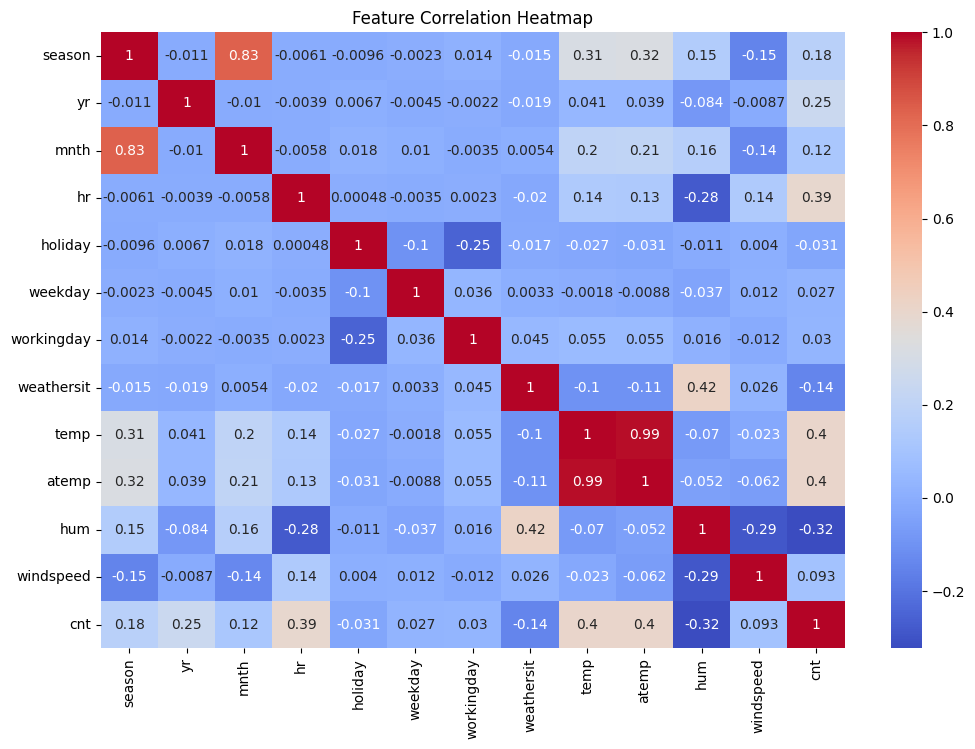

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [7]:
X = df.drop("cnt", axis=1)   # Features
y = df["cnt"]   

In [8]:
X = df[['season','mnth','hr','holiday','weekday','workingday',
        'weathersit','temp','atemp','hum','windspeed']]


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [11]:
xgb = XGBRegressor(n_estimators=600, learning_rate = 0.05,max_depth= 6,random_state=42)
xgb.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [12]:
y_pred = xgb.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
xgb_mse = mean_squared_error(y_test, y_pred)
print(f"XGBoost Regressor MSE: {xgb_mse}")

XGBoost Regressor MSE: 3825.040283203125


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_lr = model.predict(X_test)

In [17]:
mse = mean_squared_error(y_test, y_pred_lr)


print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 20723.53


In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree Regressor MSE: {dt_mse}")

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Regressor MSE: {rf_mse}")


Decision Tree Regressor MSE: 8378.233529919447
Random Forest Regressor MSE: 4252.552598704921


In [19]:
from sklearn.metrics import r2_score
print("XGB R2:", r2_score(y_test, y_pred))
print("DT R2:", r2_score(y_test, y_pred_dt))
print("RF R2:", r2_score(y_test, y_pred_rf))


XGB R2: 0.8792044520378113
DT R2: 0.7354137155870923
RF R2: 0.8657035415229578


In [20]:
from joblib import dump,load # dump is used to save the model ansd load
with open('models/bike_model.pkl','wb') as f:
    dump(xgb, "models/bike_model.pkl")
    print("model dumped successfully")

model dumped successfully
